In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [73]:
df = pd.read_csv("link_prediction_results.txt", sep=" ")
df.columns = ['Embedding', 'Operator','Dev','Test']
df

,Embedding,Operator,Dev,Test
0,node2vec_params,operator_avg,0.813609,0.645681
1,node2vec,operator_avg,0.805272,0.437873
2,deepWalk_params,operator_avg,0.782664,0.486813
3,deepWalk,operator_avg,0.799085,0.432583
4,line_params,operator_hadamard,0.779505,0.735184
5,line,operator_avg,0.794700,0.565123
6,hope,operator_avg,0.829788,0.457719
7,sdne_params,operator_avg,0.828398,0.833068
8,sdne,operator_avg,0.812131,0.691118
9,sdne_params2,operator_avg,0.816009,0.827033


## Compare Dev ROC AUC of all Methods

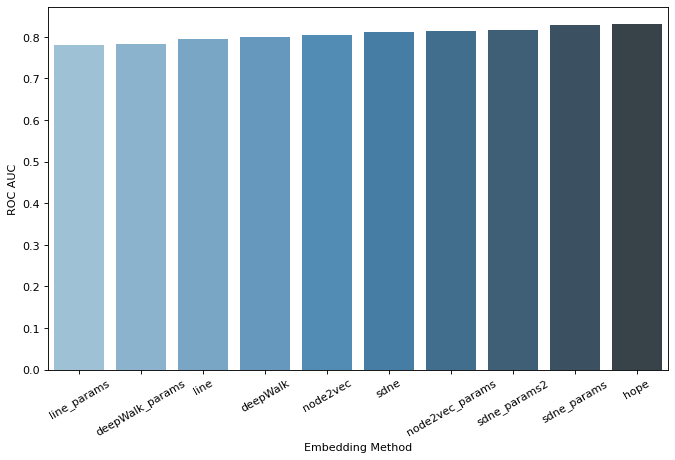

In [38]:
plt.figure(figsize=(10,6), dpi=80)

df = df.sort_values(by=['Dev'])
plt.xticks(rotation=30)
ax = sns.barplot(x="Embedding", y="Dev", data=df, palette="Blues_d")
ax.set(xlabel='Embedding Method', ylabel='ROC AUC')
plt.savefig('dev.png')
plt.show()

## Compare Test ROC AUC of all Methods

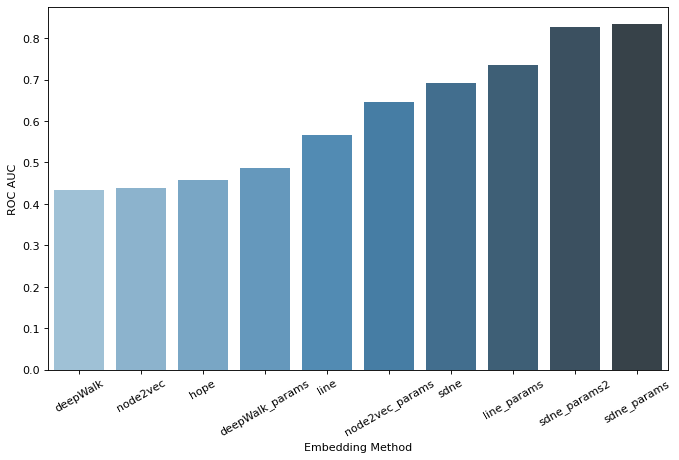

In [39]:
plt.figure(figsize=(10,6), dpi=80)

df = df.sort_values(by=['Test'])
plt.xticks(rotation=30)
ax = sns.barplot(x="Embedding", y="Test", data=df, palette="Blues_d")
ax.set(xlabel='Embedding Method', ylabel='ROC AUC')
plt.savefig('test.png')
plt.show()

# Compare both 

In [54]:
 
# initialize list of lists
data = [["node2vec_params","operator_avg" ,"Test", 0.645681],
["node2vec_params","operator_avg", "Dev",0.813609],
      
["node2vec", "operator_avg" ,"Dev",0.805272],
["node2vec", "operator_avg" ,"Test", 0.437873],
      
["deepWalk_params","operator_avg","Dev", 0.782664 ],
["deepWalk_params","operator_avg","Test",  0.486813],
      
["deepWalk", "operator_avg" ,"Dev",0.799085 ],
["deepWalk", "operator_avg" ,"Test",0.432583],
      
["line_params" ,"operator_hadamard", "Dev",0.779505 ],
["line_params" ,"operator_hadamard", "Test", 0.735184],
      
["line" ,"operator_avg","Dev",  0.794700 ],
["line" ,"operator_avg" ,"Test", 0.565123],
      
["hope" ,"operator_avg" ,"Dev",0.829788 ],
["hope" ,"operator_avg" ,"Test", 0.457719],
      
["sdne_params", "operator_avg", "Dev",0.828398 ],
["sdne_params", "operator_avg", "Test", 0.833068],
      
["sdne" ,"operator_avg", "Dev",0.812131 ],
["sdne" ,"operator_avg",  "Test",0.691118],
      
["sdne_params2", "operator_avg" ,"Dev",0.816009 ],
["sdne_params2", "operator_avg" , "Test",0.827033]]

df2 = pd.DataFrame(data, columns =  ['Embedding', 'Operator','Dataset','ROC AUC'])


In [55]:
#sorting acourding to Roc Score
df2 = df2.sort_values(["Dataset", "ROC AUC", "Embedding"], ascending = (False, False, True))
#df2

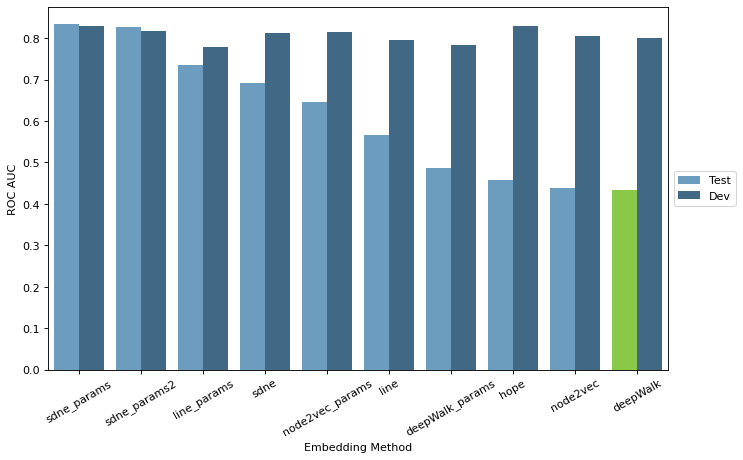

In [56]:
plt.figure(figsize=(10,6), dpi=80)
test = df2[df2["Dataset"]=="Test"]
dev= df2[df2["Dataset"]=="Dev"]

plt.xticks(rotation=30)
idx_min1 = np.argmin(test["ROC AUC"])   
idx_min2 = np.argmin(dev["ROC AUC"])  

ax = sns.barplot(x="Embedding", y="ROC AUC", hue="Dataset",data=df2, palette="Blues_d")
ax.set(xlabel='Embedding Method', ylabel='ROC AUC')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.patches[idx_min1].set_facecolor('#8AC847') 
#ax.patches[idx_min2].set_facecolor('#8AC847') 

plt.savefig('both.png')
plt.show()

#### Adding a plot with the average

In [60]:
df3 = df2.groupby(by=["Dataset"]).mean()
df3.reset_index(inplace=True)


df2.loc[20] = ['Average','None', 'Test', df3[df3["Dataset"] == "Test"].values[0][1]]
df2.loc[21] = ['Average','None', 'Dev', df3[df3["Dataset"] == "Dev"].values[0][1]]

9


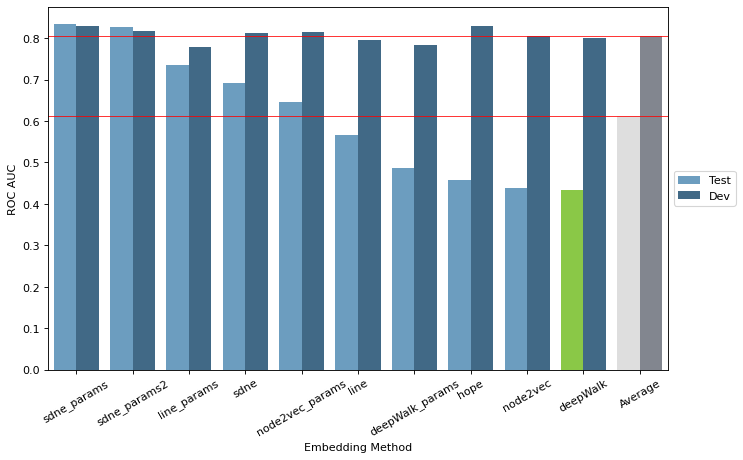

In [111]:
plt.figure(figsize=(10,6), dpi=80)
test = df2[df2["Dataset"]=="Test"]
dev= df2[df2["Dataset"]=="Dev"]

plt.xticks(rotation=30)
idx_min1 = np.argmin(test["ROC AUC"])   
idx_min2 = np.argmin(dev["ROC AUC"])  

 

ax = sns.barplot(x="Embedding", y="ROC AUC", hue="Dataset",data=df2, palette="Blues_d")
ax.set(xlabel='Embedding Method', ylabel='ROC AUC')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.patches[idx_min1].set_facecolor('#8AC847') 
#ax.patches[idx_min2].set_facecolor('#8AC847') 

print(idx_min1)

plt.axhline(y=df3[df3["Dataset"] == "Test"].values[0][1],linewidth=0.7, color="red")
plt.axhline(y=df3[df3["Dataset"] == "Dev"].values[0][1],linewidth=0.7, color="red")

ax.patches[10].set_facecolor('#dedede') 
ax.patches[21].set_facecolor('#82868f') 


plt.savefig('both_with_average.png')
plt.show()

## Operator

In [74]:
op = df[['Embedding', 'Operator']]
op

,Embedding,Operator
0,node2vec_params,operator_avg
1,node2vec,operator_avg
2,deepWalk_params,operator_avg
3,deepWalk,operator_avg
4,line_params,operator_hadamard
5,line,operator_avg
6,hope,operator_avg
7,sdne_params,operator_avg
8,sdne,operator_avg
9,sdne_params2,operator_avg


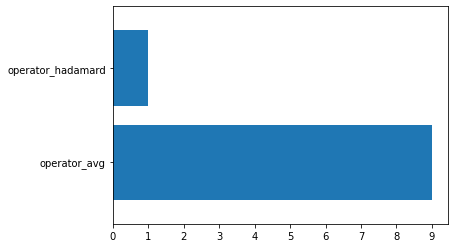

In [112]:
%matplotlib inline

op.Operator.value_counts().plot(kind='barh', width= 0.8)
plt.xticks(np.arange(0, 10, 1))

plt.savefig('operator.png')

In [26]:
df.Embedding

3           deepWalk
1           node2vec
6               hope
2    deepWalk_params
5               line
0    node2vec_params
8               sdne
4        line_params
9       sdne_params2
7        sdne_params
Name: Embedding, dtype: object